# **Vector data**

- [Link to this lesson](https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python/index.html)

## Read vector data (``gpkg`` format)

In [1]:
import geopandas as gpd

In [2]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")
fields

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117626.809 505287.535, 117622.930 50..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((117744.449 504313.788, 117746.064 50..."
2,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117784.216 503525.695, 117789.021 50..."
3,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((117903.681 504159.929, 117908.257 50..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((118150.139 505369.637, 118168.010 50..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139366.829 479190.018, 139391.354 47..."
22027,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((138750.889 478528.117, 138722.478 47..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((139214.523 479446.287, 139104.402 47..."
22029,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((140196.363 479281.898, 140195.206 47..."


In [3]:
type(fields)

geopandas.geodataframe.GeoDataFrame

- Create a bounding box to subset the `gpkg` data while reading the data in

In [4]:
# Define bounding box
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)
bbox

(110000, 470000, 140000, 510000)

In [5]:
# Partially load data within the bounding box
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)
fields

,category,gewas,gewascode,jaar,status,geometry
0,Bouwland,"Gerst, zomer-",236,2020,Definitief,"POLYGON ((112701.927 469461.513, 112742.745 46..."
1,Bouwland,"Maïs, snij-",259,2020,Definitief,"POLYGON ((112894.273 469539.714, 112899.962 46..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112714.585 469792.879, 112746.317 46..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112477.552 469951.205, 112496.172 46..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((112384.744 469953.238, 112405.630 46..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133379.924 49..."
22027,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133426.347 49..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133587.600 49..."
22029,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133481.442 49..."


<Axes: >

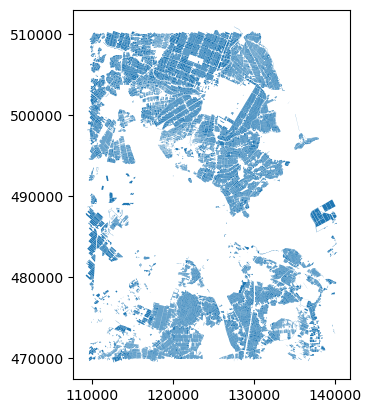

In [6]:
fields.plot()

## Check vector data attributes and metadata

In [7]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

- Check out bounds of current vector data

In [8]:
fields.total_bounds

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

- Crop the vector data even more

- ``fields.cx`` allows us to use a bounding box to subset data after data is read in
- ``fields[]`` can only retrieve attributes of ``fields``

In [9]:
# A smaller bounding box in RD
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)

fields_cx = fields.cx[xmin:xmax, ymin:ymax]
fields_cx

,category,gewas,gewascode,jaar,status,geometry
870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120154.932 495930.341, 120159.250 49..."
871,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120101.483 496378.781, 120102.674 49..."
872,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((119858.185 496057.345, 119859.714 49..."
873,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((120168.354 496651.174, 120168.535 49..."
874,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((119944.018 496061.229, 119949.971 49..."
...,...,...,...,...,...,...
22026,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133371.140 492631.152, 133379.924 49..."
22027,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133422.246 492887.057, 133426.347 49..."
22028,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((133554.659 492738.186, 133587.600 49..."
22029,Grasland,"Grasland, natuurlijk. Hoofdfunctie landbouw.",331,2020,Definitief,"POLYGON ((133434.981 492748.790, 133481.442 49..."


<Axes: >

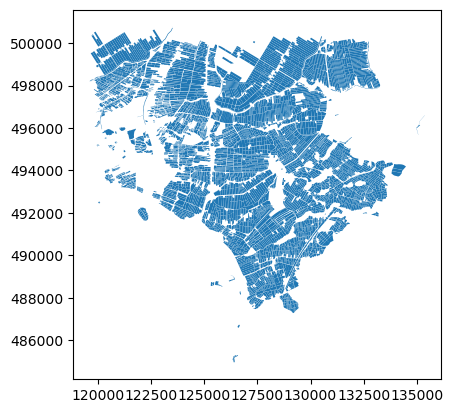

In [11]:
# plot cropped vector data
fields_cx.plot()

- Save to a Shapefile

In [12]:
fields_cx.to_file('fields_cropped.shp')

- Read shapefile using `gpd` library functionalities

In [20]:
fields = gpd.read_file("fields_cropped.shp")
wells = gpd.read_file("data/brogmwvolledigeset.zip")

<Axes: >

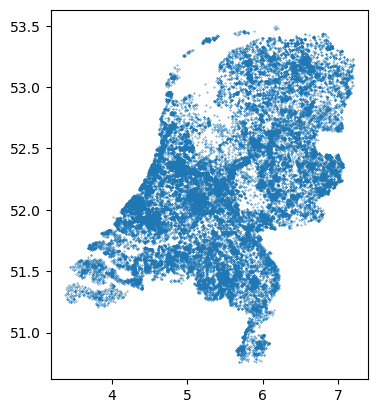

In [21]:
wells.plot(markersize = .1)

## Overlaying vector and raster data

- [link to lesson](https://carpentries-incubator.github.io/geospatial-python/08-crop-raster-data/index.html)

In [22]:
fields_epsg = fields_cx.crs.to_epsg()
fields_epsg

28992

In [23]:
wells = wells.to_crs(epsg=fields_epsg)

- The following ``clip`` function only works when the two file's epsg are the same

<Axes: >

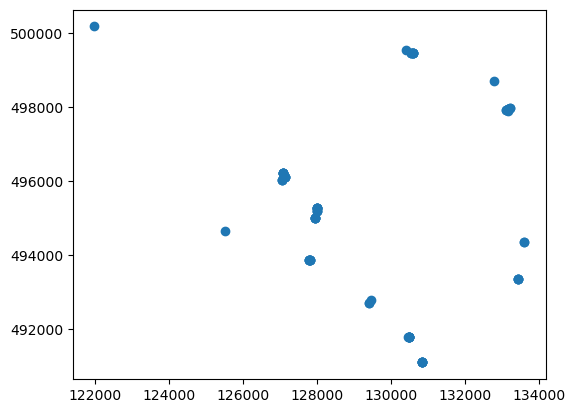

In [24]:
wells_clip = wells.clip(fields_cx)
wells_clip.plot()

In [25]:
import pystac
import rioxarray

In [26]:
items = pystac.ItemCollection.from_file("search.json")
vis_href = items[0].assets["visual"].href
raster = rioxarray.open_rasterio(vis_href)

In [27]:
raster.rio.crs

CRS.from_epsg(32631)

In [28]:
fields = fields_cx.to_crs(raster.rio.crs)

<Axes: >

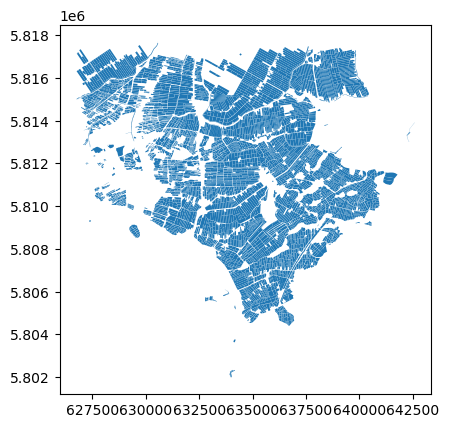

In [30]:
fields.plot()

In [32]:
# Crop the raster with the bounding box
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)
print(raster_clip_box.shape)

(3, 1574, 1584)


In [35]:
raster_clip_fields = raster_clip_box.rio.clip(fields['geometry'])

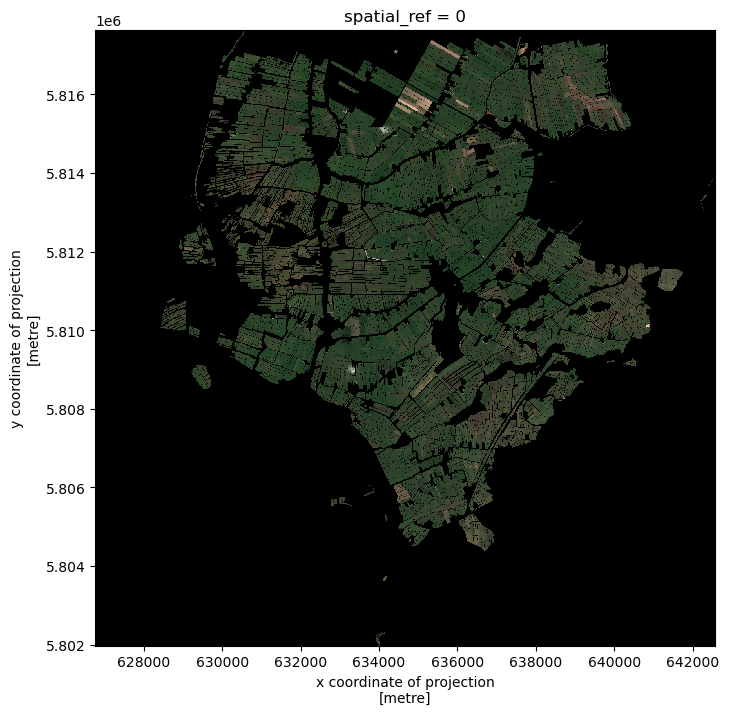

In [36]:
raster_clip_fields.plot.imshow(figsize=(8,8))